In [5]:
!pip install pandas
!pip install tensorflow
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from tensorflow.keras.utils import to_categorical
# Utility function to print 'string' expression (not statement) & eval with its scope
def sval(string,scope=locals()): print("\n"+string+" ==> "+str(eval(string,scope))+"\n")

In [2]:
iris = load_iris( as_frame=True) # iris data 품질이 좋음 --> 상관관계 높음
print( iris['DESCR'] )
df = iris['frame']
df

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


3일차 과제 (2024-11-13) : iris data
1. 상관관계, heatmap
2. 정규화
3. train test
4. 학습( 딥러닝, validation)
5. train:정확도,f1, confusion matrix
   test:정확도,f1, confusion matrix

In [3]:
x_data = df.iloc[:,:-1].values
y_data = to_categorical (df.iloc[:,[-1]].values)


x_data.shape ==> (150, 4)


y_data.shape ==> (150, 3)



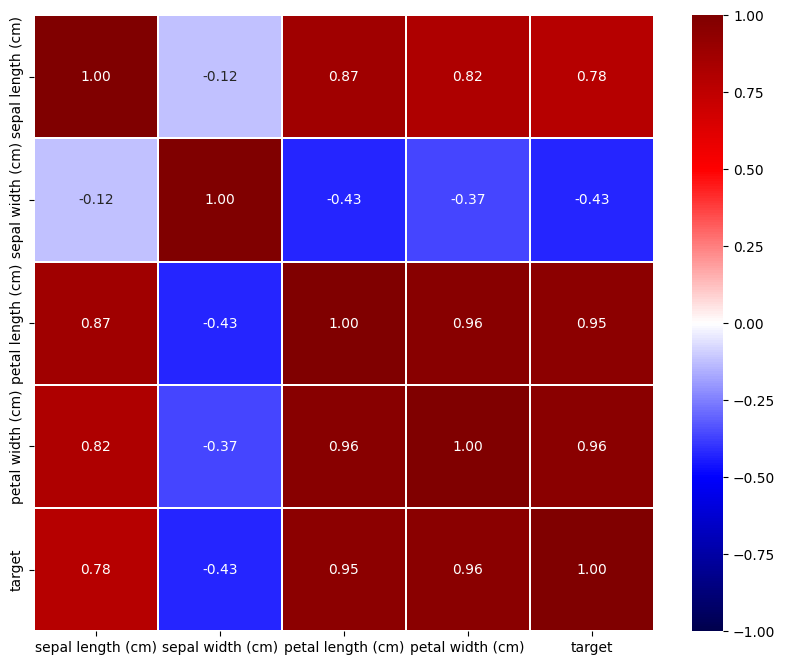


x_train.shape ==> (105, 4)


x_test.shape ==> (45, 4)



In [6]:
#
# Data Preparation
#
sval('x_data.shape') # (150, 4) # input_dim <= 4
sval('y_data.shape') # (150, 3) # units => 3 due to to_categorical             

"""
- Iris-Setosa
- Iris-Versicolour
- Iris-Virginica
"""

import seaborn as sb
import matplotlib.pyplot as plt

plt.figure( figsize=(10,8) )
sb.heatmap( df.corr(), vmin=-1, vmax=1, annot=True, linewidths=0.2, fmt='.2f', cmap='seismic' )
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

Scaler   = MinMaxScaler()
x_data_N = Scaler.fit_transform(x_data)
x_train, x_test, y_train,y_test = train_test_split(x_data_N, y_data, test_size = 0.3 )

sval('x_train.shape')
sval('x_test.shape')

In [7]:
dense1 = Dense( input_dim =  4, units= 128,  activation='relu' )
dense2 = Dense( input_dim =100, units=   3,  activation='softmax' ) 
model = Sequential( [dense1,dense2])
model.compile( loss='categorical_crossentropy', optimizer=Adam(0.1), metrics=['acc'] )

In [8]:
h = model.fit(x_train, y_train, epochs=500)

Epoch 1/500
4/4 [==============================] - 0s 2ms/step - loss: 1.0644 - acc: 0.4857
Epoch 2/500
4/4 [==============================] - 0s 1ms/step - loss: 0.5596 - acc: 0.7238
Epoch 3/500
4/4 [==============================] - 0s 1ms/step - loss: 0.5032 - acc: 0.6667
Epoch 4/500
4/4 [==============================] - 0s 998us/step - loss: 0.4299 - acc: 0.7143
Epoch 5/500
4/4 [==============================] - 0s 1ms/step - loss: 0.3983 - acc: 0.7333
Epoch 6/500
4/4 [==============================] - 0s 1ms/step - loss: 0.3390 - acc: 0.8762
Epoch 7/500
4/4 [==============================] - 0s 1ms/step - loss: 0.2125 - acc: 0.9333
Epoch 8/500
4/4 [==============================] - 0s 1ms/step - loss: 0.2048 - acc: 0.9333
Epoch 9/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1441 - acc: 0.9619
Epoch 10/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1253 - acc: 0.9333
Epoch 11/500
4/4 [==============================] - 0s 1ms/step - loss: 0.119

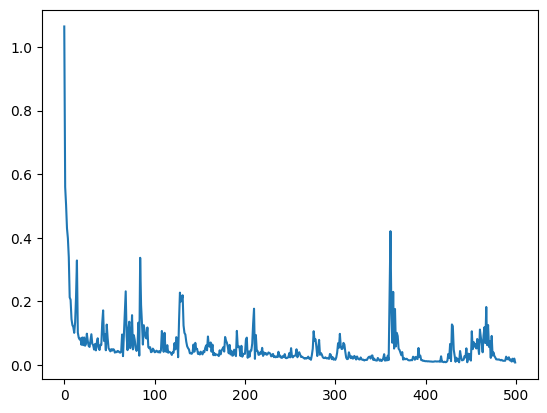

In [9]:
plt.plot( h.history['loss'])
plt.show()

In [10]:

#
# sepal length (cm)	sepal width (cm)	petal length (cm)	petal width (cm) --> target (종분류)
#              4.9,             3.0,                 1.4,               0.2
#
y_train_v      = y_train.argmax(axis=1)
y_test_v       = y_test.argmax(axis=1)
y_train_pred_v = model.predict(x_train).argmax(axis=1)
y_test_pred_v  = model.predict(x_test).argmax(axis=1)

sval('accuracy_score( y_train_v, y_train_pred_v)') #  accuracy_score for train data 
sval('accuracy_score( y_test_v,  y_test_pred_v)' ) #  accuracy_score for test data

2/2 [==============================] - 0s 1ms/step

accuracy_score( y_train_v, y_train_pred_v) ==> 0.9904761904761905


accuracy_score( y_test_v,  y_test_pred_v) ==> 0.9555555555555556



In [11]:
# from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

f1_score_train = f1_score( y_train_v, y_train_pred_v, average='macro')  
f1_score_test =  f1_score( y_test_v,  y_test_pred_v , average='macro')

sval('f1_score_train')
sval('f1_score_test')



f1_score_train ==> 0.9901769591910438


f1_score_test ==> 0.9568151147098516



In [12]:
print(confusion_matrix( y_train_v, y_train_pred_v))
print(confusion_matrix( y_test_v, y_test_pred_v))


[[37  0  0]
 [ 0 35  1]
 [ 0  0 32]]
[[13  0  0]
 [ 0 12  2]
 [ 0  0 18]]
